<a href="https://colab.research.google.com/github/chitchi46/business-intelligence/blob/main/GCI2025S_%E7%AC%AC8%E5%9B%9E_%E6%95%99%E5%B8%AB%E3%81%AA%E3%81%97%E5%AD%A6%E7%BF%92_%E5%8F%82%E8%80%83%E3%82%B3%E3%83%BC%E3%83%88%E3%82%99.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

配布コードの目的：
①乳がんデータを用いて、PCAの様々な要素を可視化する。
②実務絵よく行う、次元削減後のデータを用いたクラスタリングとその可視化のサンプルを提示する。

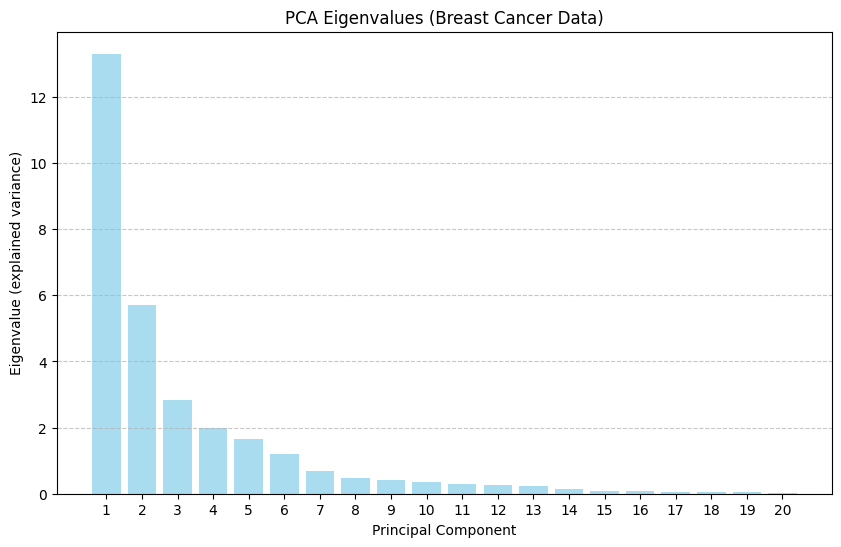

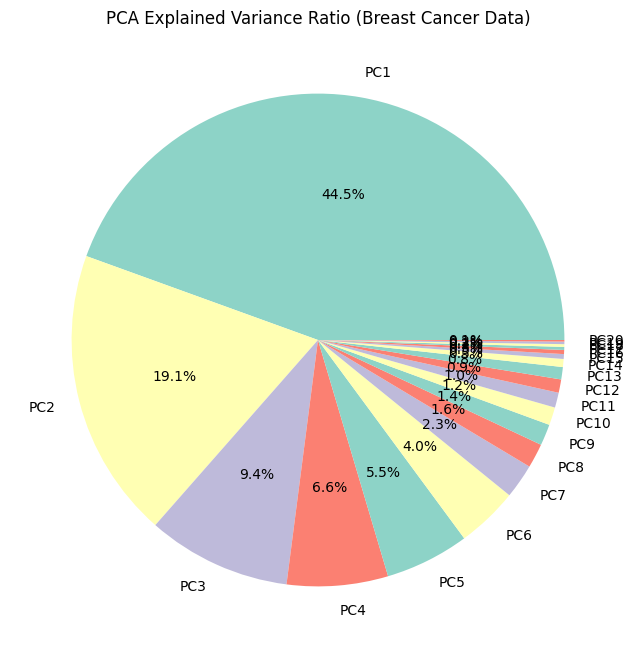

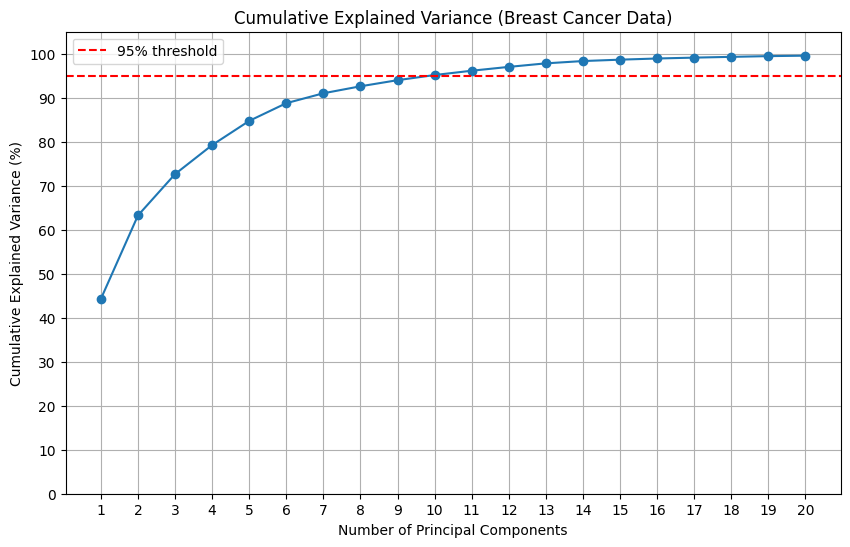

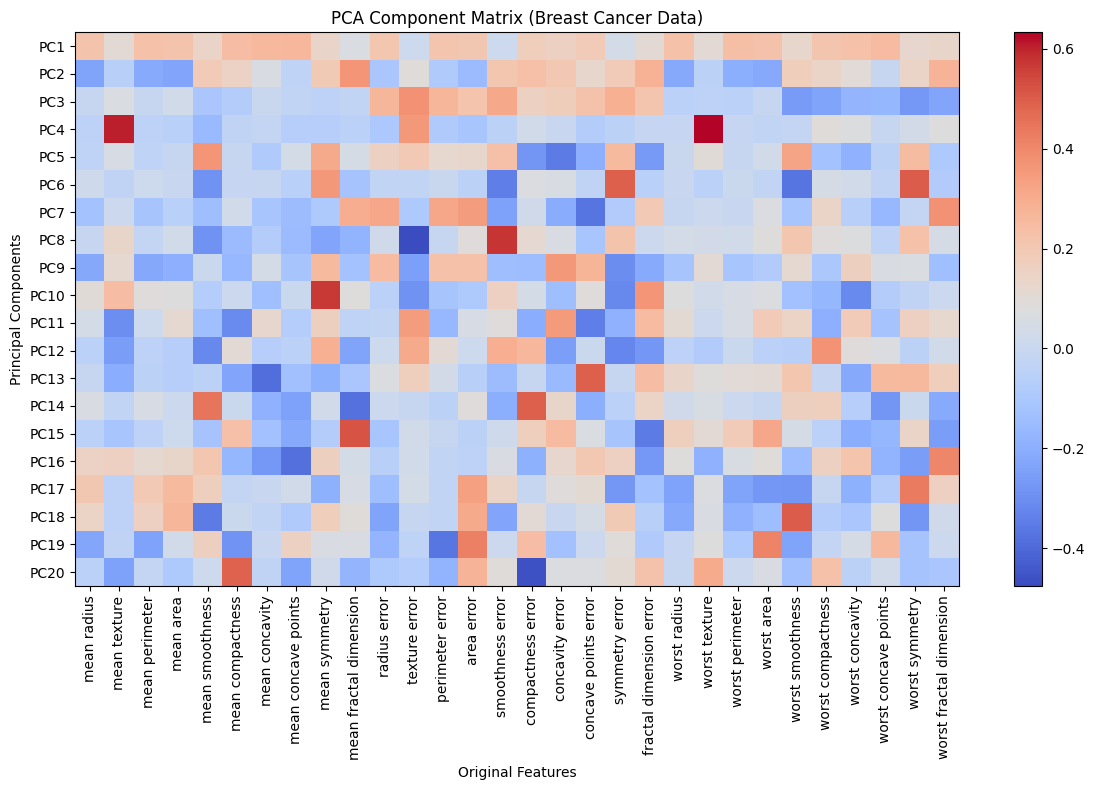

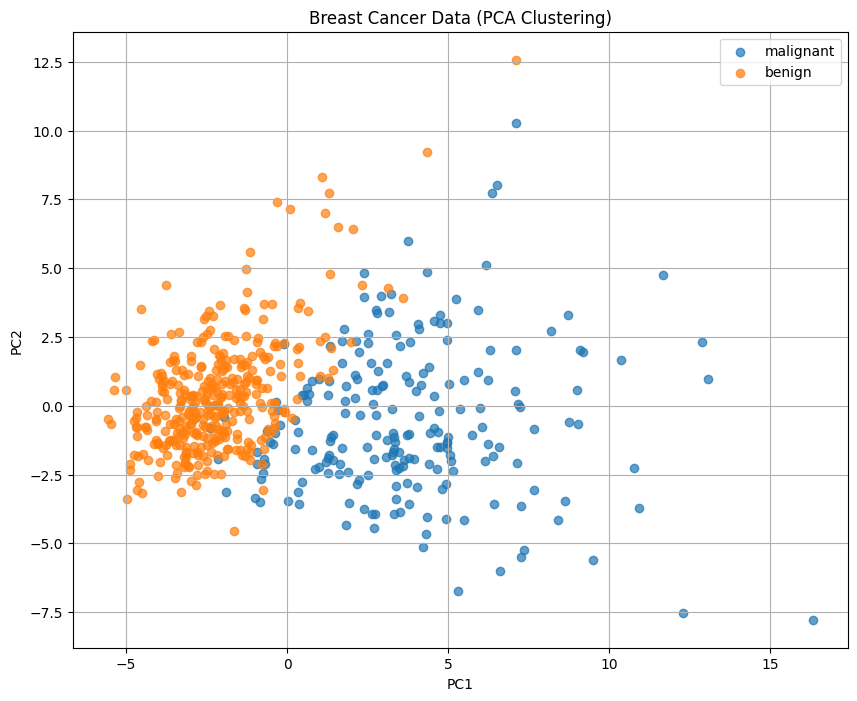

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# -----------------------------------------
# 1. データの読み込み（乳がん診断データセット）
# -----------------------------------------
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# -----------------------------------------
# 2. 標準化（PCAの前処理として重要）
# -----------------------------------------
# すべての特徴量を「平均0・分散1」に揃える
sc = StandardScaler()
X_std = sc.fit_transform(X)

# -----------------------------------------
# 3. 主成分分析（PCA）で次元圧縮
# -----------------------------------------
pca = PCA(n_components=20)
X_pca = pca.fit_transform(X_std)

# -----------------------------------------
# 4. 固有値の棒グラフ（各主成分の情報量の可視化）
# -----------------------------------------
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(pca.explained_variance_)+1), pca.explained_variance_, alpha=0.7, color='skyblue')
plt.ylabel('Eigenvalue (explained variance)')
plt.xlabel('Principal Component')
plt.title('PCA Eigenvalues (Breast Cancer Data)')
plt.xticks(range(1, len(pca.explained_variance_)+1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# -----------------------------------------
# 5. 寄与率の円グラフ（主成分ごとの重要度）
# -----------------------------------------
plt.figure(figsize=(8, 8))
plt.pie(pca.explained_variance_ratio_,
        labels=[f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))],
        autopct='%1.1f%%',
        colors=plt.cm.Set3(np.arange(4)))
plt.title('PCA Explained Variance Ratio (Breast Cancer Data)')
plt.show()

# -----------------------------------------
# 6. 累積寄与率の折れ線グラフ（全体の情報の何％を保持しているか）
# -----------------------------------------
cumulative_variance = np.cumsum(pca.explained_variance_ratio_) * 100  # ％に変換

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='-')
plt.xticks(range(1, len(cumulative_variance)+1))
plt.yticks(np.arange(0, 110, 10))
plt.ylim(0, 105)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('Cumulative Explained Variance (Breast Cancer Data)')
plt.axhline(y=95, color='red', linestyle='--', label='95% threshold')
plt.grid(True)
plt.legend()
plt.show()

# -----------------------------------------
# 7. 固有ベクトルのヒートマップ（各主成分の構成）
# -----------------------------------------
plt.figure(figsize=(12, 8))
plt.imshow(pca.components_, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.xticks(range(X.shape[1]), cancer.feature_names, rotation=90)
plt.yticks(range(len(pca.components_)), [f'PC{i+1}' for i in range(len(pca.components_))])
plt.xlabel('Original Features')
plt.ylabel('Principal Components')
plt.title('PCA Component Matrix (Breast Cancer Data)')
plt.tight_layout()
plt.show()

# -----------------------------------------
# 8. PCA後のデータを使ったk-meansクラスタリング
# -----------------------------------------
kmeans = KMeans(n_clusters=2, random_state=0)
clusters = kmeans.fit_predict(X_pca[:, :2])

# -----------------------------------------
# 9. PCA空間（PC1, PC2）で正解ラベルを色分け可視化
# -----------------------------------------
plt.figure(figsize=(10, 8))
for i, target_name in enumerate(cancer.target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=target_name, alpha=0.7)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Breast Cancer Data (PCA Clustering)')
plt.legend()
plt.grid(True)
plt.show()


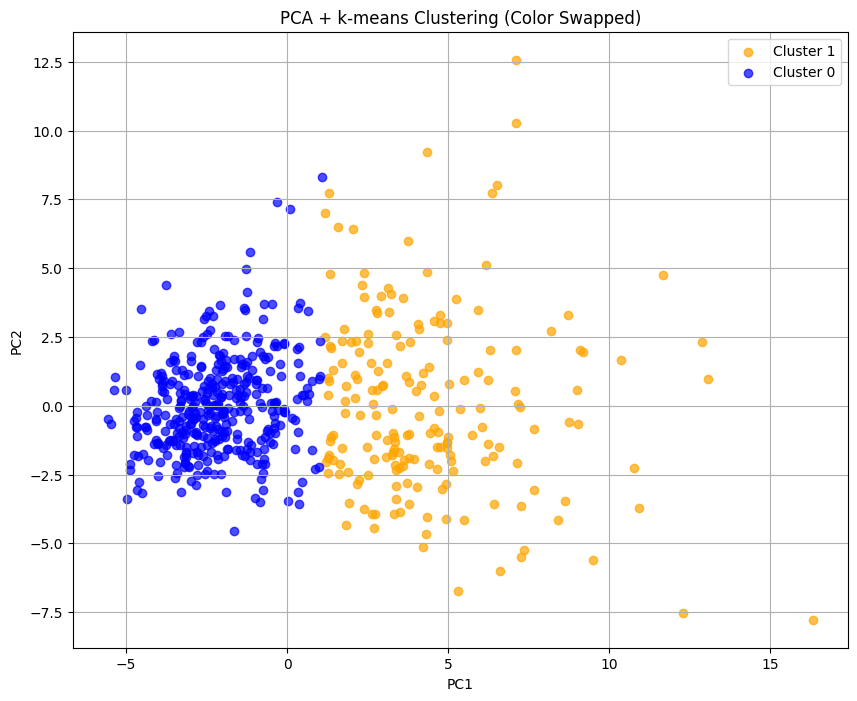

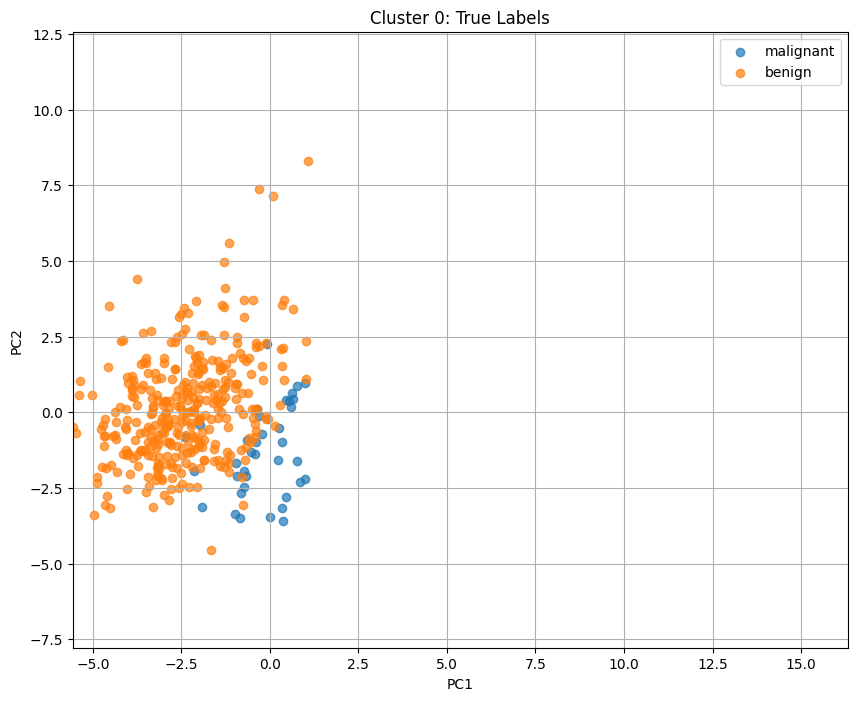

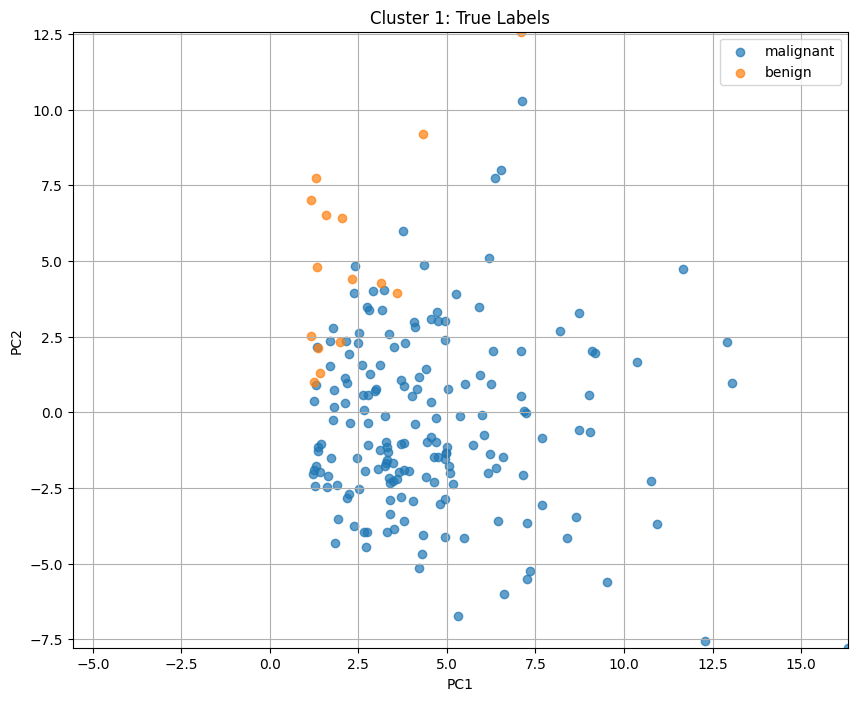

In [ ]:
# 1. 全体プロット + 軸範囲の取得
plt.figure(figsize=(10, 8))
colors = ['orange', 'blue']
for i, cluster_id in enumerate([1, 0]):
    plt.scatter(X_pca[clusters == cluster_id, 0], X_pca[clusters == cluster_id, 1],
                label=f'Cluster {cluster_id}', alpha=0.7, color=colors[i])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA + k-means Clustering (Color Swapped)')
plt.legend()
plt.grid(True)
plt.show()

# 軸範囲を取得
x_min, x_max = X_pca[:, 0].min(), X_pca[:, 0].max()
y_min, y_max = X_pca[:, 1].min(), X_pca[:, 1].max()

# 2. Cluster 0 の中で真のラベルで可視化
plt.figure(figsize=(10, 8))
for i, label in enumerate(cancer.target_names):
    plt.scatter(X_pca[(clusters == 0) & (y == i), 0],
                X_pca[(clusters == 0) & (y == i), 1],
                label=f'{label}', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cluster 0: True Labels')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend()
plt.grid(True)
plt.show()

# 3. Cluster 1 の中で真のラベルで可視化
plt.figure(figsize=(10, 8))
for i, label in enumerate(cancer.target_names):
    plt.scatter(X_pca[(clusters == 1) & (y == i), 0],
                X_pca[(clusters == 1) & (y == i), 1],
                label=f'{label}', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cluster 1: True Labels')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend()
plt.grid(True)
plt.show()


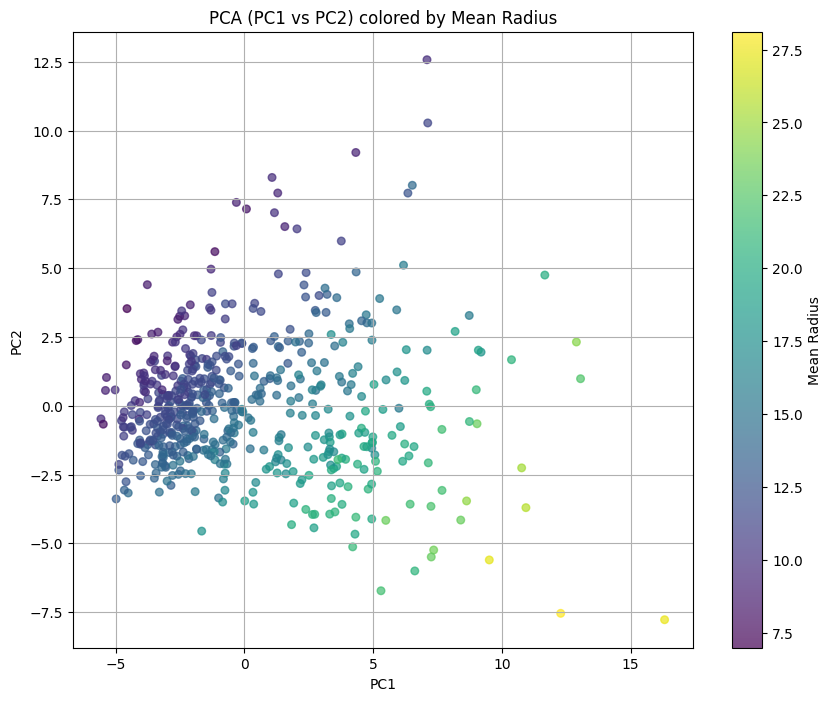

In [ ]:
#主成分で寄与していると考えられる mean radiusにてクラスターの傾向を可視化する
mean_radius = X[:, 0]  # 'mean radius' の元の値

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=mean_radius, cmap='viridis', s=30, alpha=0.7)
plt.colorbar(scatter, label='Mean Radius')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA (PC1 vs PC2) colored by Mean Radius')
plt.grid(True)
plt.show()
